<a href="https://www.kaggle.com/code/apttemi/wine-classification-knn?scriptVersionId=134540143" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [90]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-classification-data/wine.csv


# Aim: KNN on Wine dataset

**Discussion: What is KNN?**
KNN stands for k-nearest neighbors. It is an ML algorithm that can be used for both classification and regression. For classification problems, a class label is assigned on the basis of a majority vote—i.e. the label that is most frequently represented around a given data point is used. 
More information available on [IBM](https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20algorithm%2C%20also%20known%20as%20KNN%20or,of%20an%20individual%20data%20point.) and [Datacamp](https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn)

In [91]:
df = pd.read_csv('/kaggle/input/wine-classification-data/wine.csv')

# EDA 

In [92]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [93]:
#info, describe, duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [94]:
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [95]:
#check for duplicates
print("duplicate rows check:") 
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

print("Number of duplicate rows:", num_duplicates)

duplicate rows check:
Number of duplicate rows: 0


In [96]:
#check for missing values
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

**Discussion: What is KNN?**
KNN stands for k-nearest neighbors. It is an ML algorithm that can be used for both classification and regression. For classification problems, a class label is assigned on the basis of a majority vote—i.e. the label that is most frequently represented around a given data point is used. 
More information available on [IBM](https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20algorithm%2C%20also%20known%20as%20KNN%20or,of%20an%20individual%20data%20point.) and [Datacamp](https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn)

# Data visualization

In [97]:
target_variable = df["Wine"]

[Text(0.5, 1.0, 'Distribution of wine classes')]

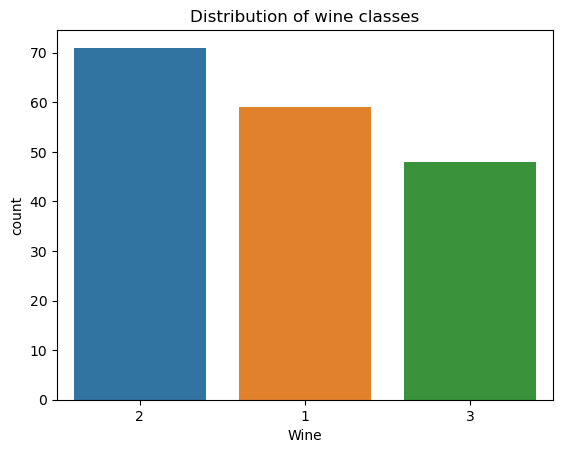

In [98]:
#Visualize the target variable
sns.countplot(x=target_variable, 
              data=df,
              order=df['Wine'].value_counts().index).set(title='Distribution of wine classes')

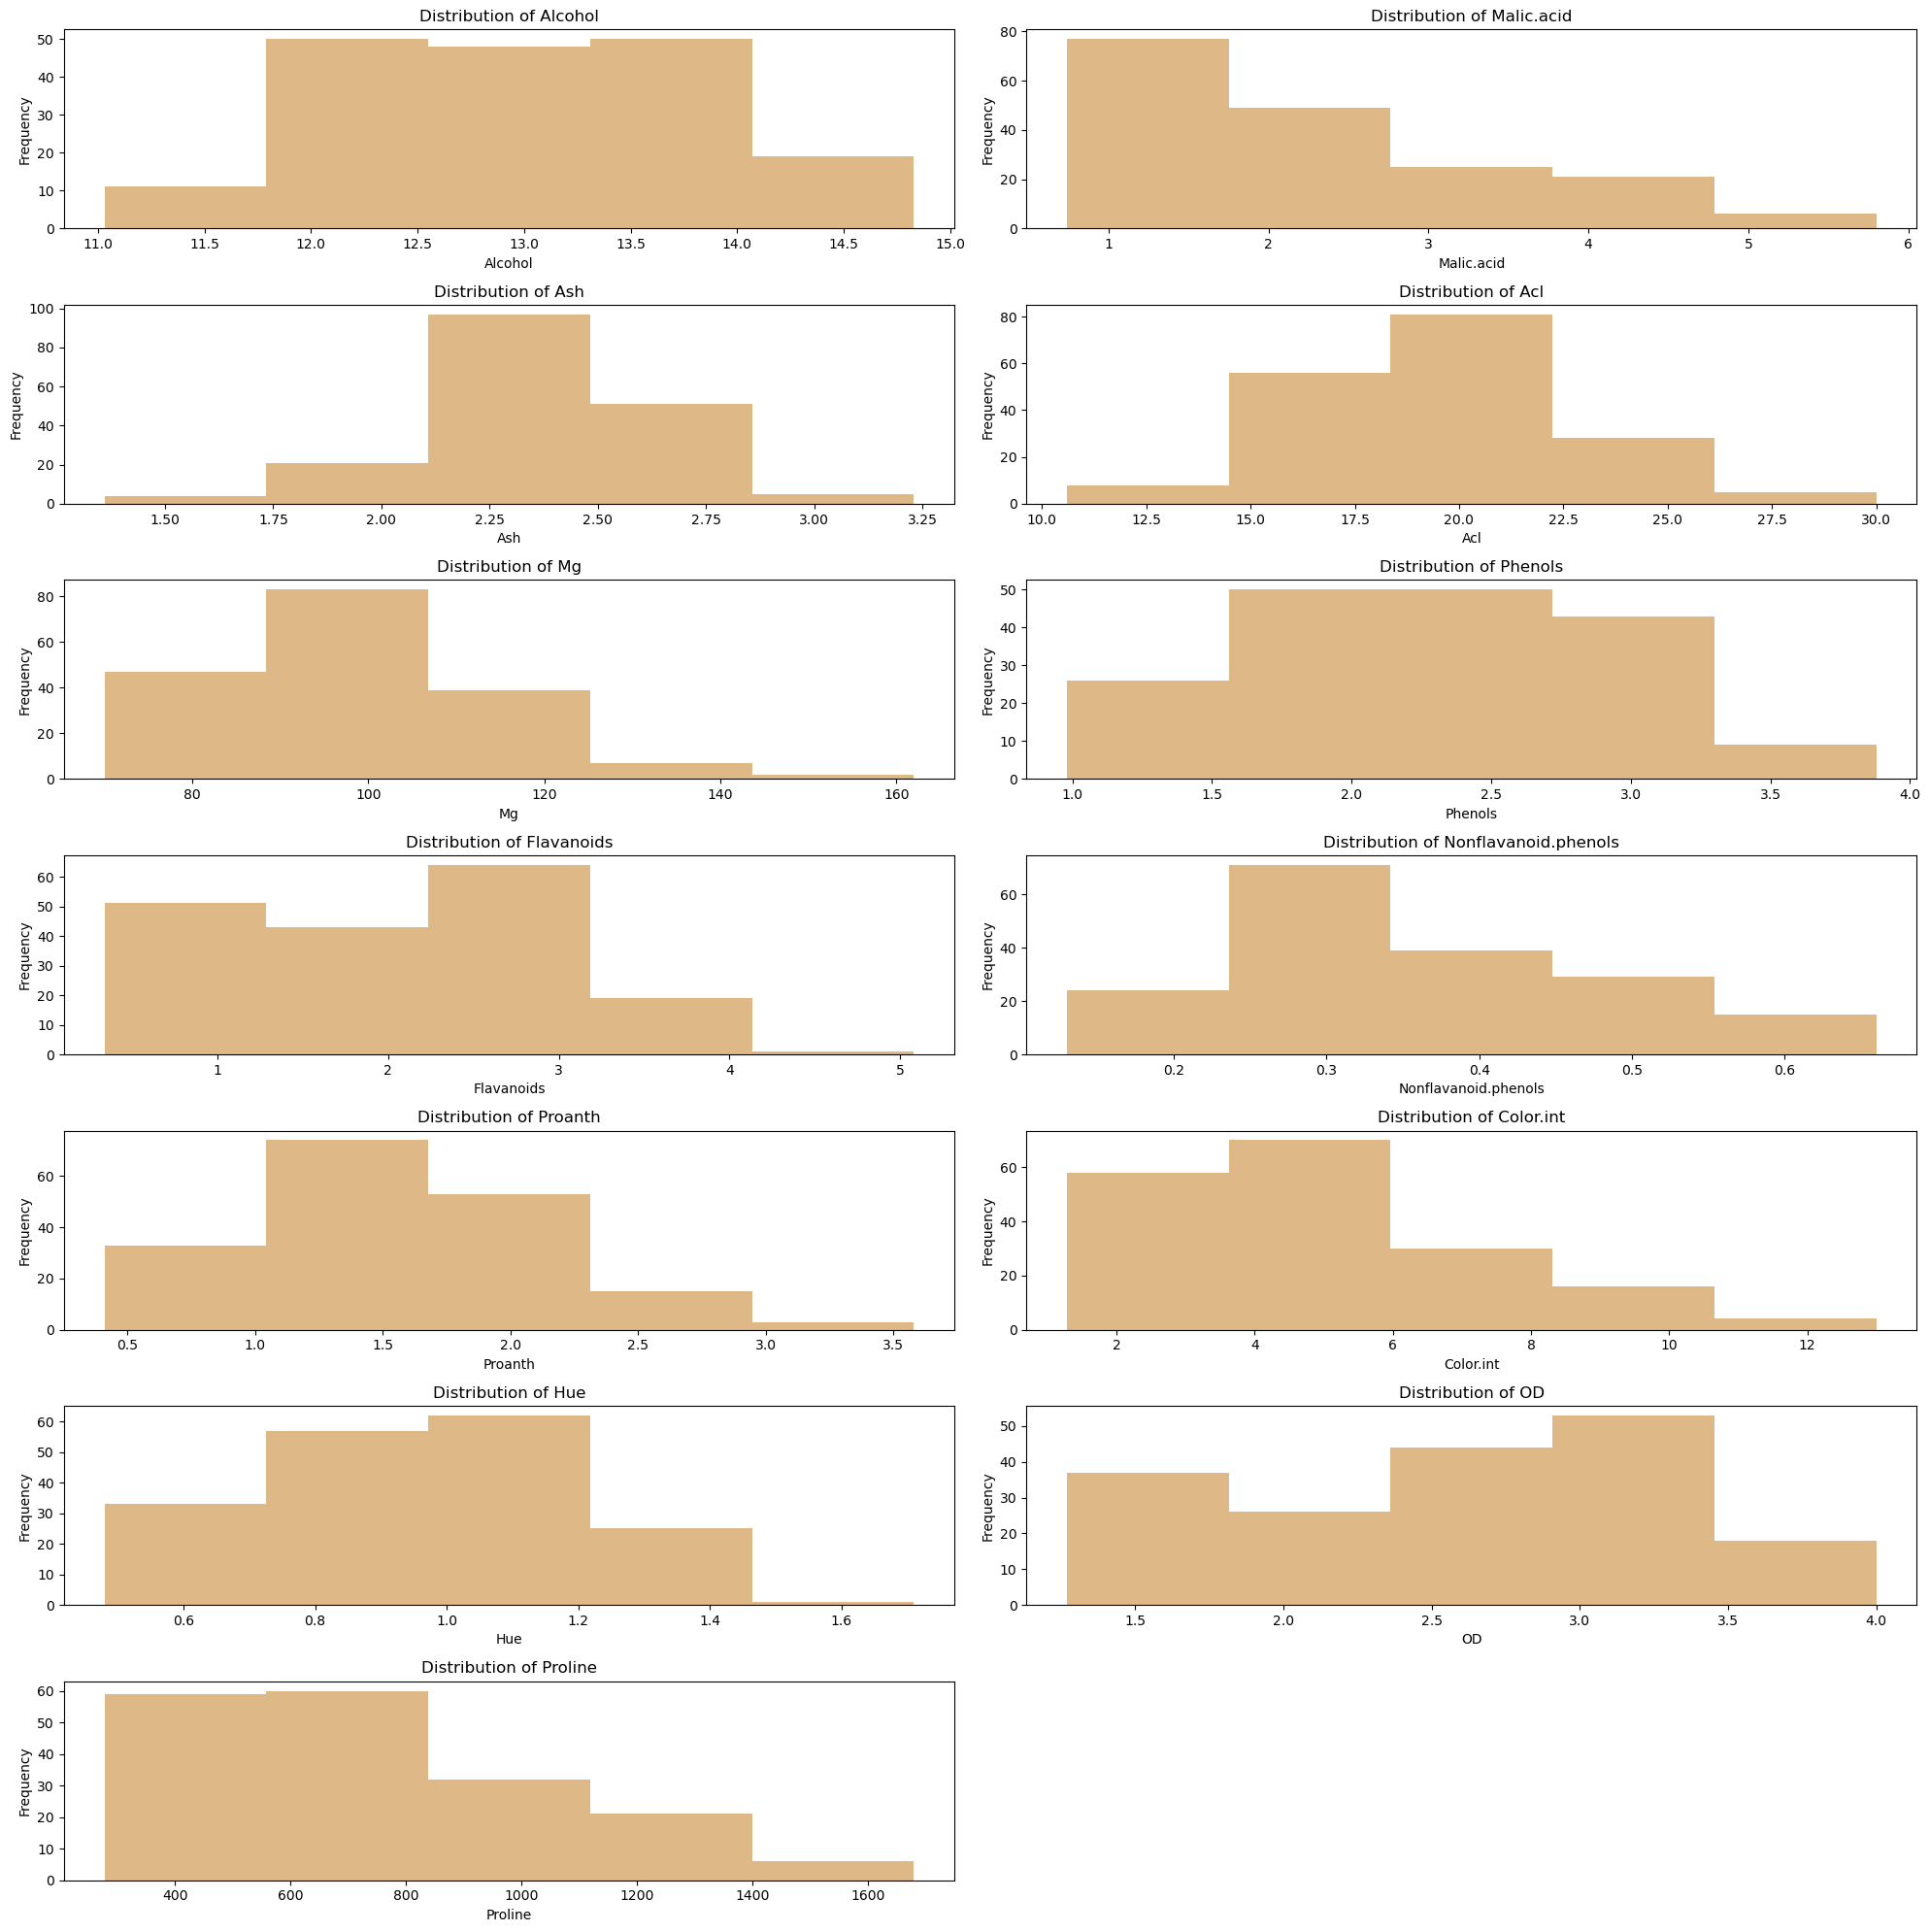

In [99]:
#histogram of the other variables
#plotting the feature variables
feature_variables = ["Alcohol", "Malic.acid", "Ash", "Acl", "Mg","Phenols","Flavanoids",
           "Nonflavanoid.phenols","Proanth", "Color.int", "Hue", "OD", "Proline"]


# Calculate the number of rows and columns for the subplot grid
num_cols = 2  # Number of columns in the subplot grid
num_rows = (len(feature_variables) + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))  # Adjust the figsize as needed

# Plot histograms for each feature variable
for i, column in enumerate(feature_variables):
    row = i // num_cols  # Calculate the row index for the current subplot
    col = i % num_cols  # Calculate the column index for the current subplot

    axes[row, col].hist(df[column], bins=5, color='burlywood')  # Adjust the number of bins as needed
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'Distribution of {column}')

# Delete unused subplots and adjust layout
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [100]:
#check the correlation between the variables
column_corr = df.corr()
column_corr['Wine'].sort_values(ascending=False)

Wine                    1.000000
Acl                     0.517859
Nonflavanoid.phenols    0.489109
Malic.acid              0.437776
Color.int               0.265668
Ash                    -0.049643
Mg                     -0.209179
Alcohol                -0.328222
Proanth                -0.499130
Hue                    -0.617369
Proline                -0.633717
Phenols                -0.719163
OD                     -0.788230
Flavanoids             -0.847498
Name: Wine, dtype: float64

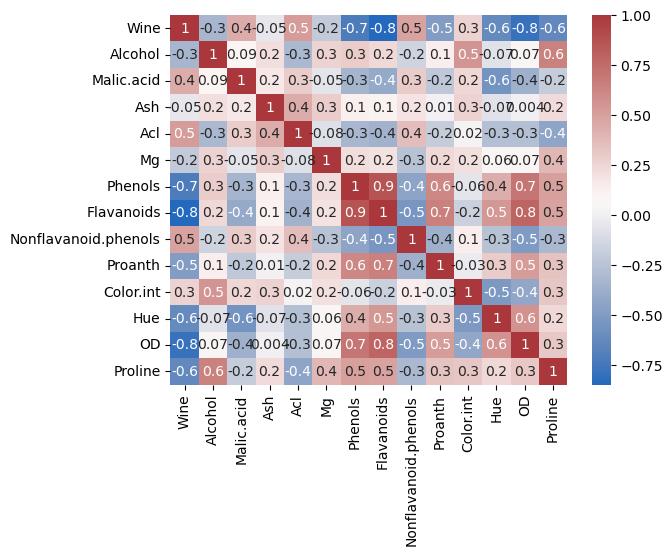

In [101]:
#plot it in a heatmap
heatmap = sns.heatmap(column_corr, annot=True, cmap="vlag", fmt='.1g')

# Discussion: Correlation coefficients
* **Moderate positive:** As the feature variable increases, the target variable increases but not as strongly as in the case of variables with higher positive correlation coefficients. The feature variables with moderate positive correlation with Wine are Acl (0.517859), Nonflavanoid.phenols (0.489109), and Malic.acid (0.437776).
* **Weak positive:** As the feature variable increases, the target variable tends to increase, but the relationship is relatively weak. Color.int has this relationship with Wine at 0.265668
* **Weak negative:** As the feature variable increases, the target variable tends to decrease slightly, but the relationship is very weak. Ash, Mg, and Alcohol have this relationship with Wine at -0.049643, -0.209179, and -0.328222 respectively.
* **Moderate negative:** As the fetare variable increases, the target variable tends to decrease but the relationship is not as strong as in variables with higher negative correlation coefficients. Proanth at -0.499130 has this relationship with Wine.
* **Strong negative**: As the feature variable increases, the target variable tends to decrease, and the relationship is relatively strong. Hue (-0.617369), Proline (-0.633717), Phenols (-0.719163), OD (-0.788230) and Flavanoids (-0.847498) have this relationship with the Wine variable.

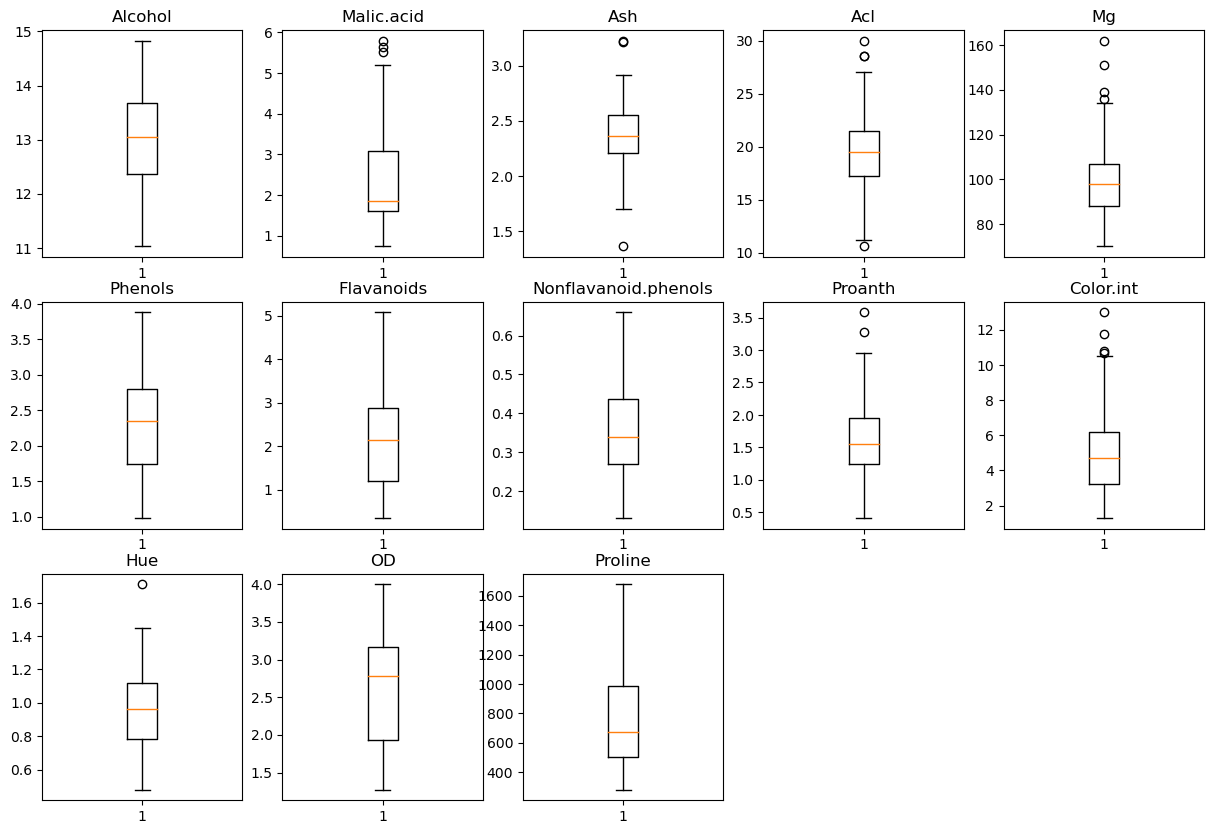

In [102]:
#check for outliers in the feature variables

# Create a box plot for each column
fig, axes = plt.subplots(nrows=(len(feature_variables) // 5) + 1, 
                         ncols=5, figsize=(15, 10))

for i, column in enumerate(feature_variables):
    ax = axes[i // 5, i % 5]
    ax.boxplot(df[column].dropna())
    ax.set_title(column)

# Remove unused subplots
for j in range(len(feature_variables), (len(feature_variables) // 5 + 1) * 5):
    if j < len(feature_variables):
        continue
    fig.delaxes(axes[j // 5, j % 5])

# Building the KNN model

In [103]:
# Split the data into features (X) and target (y)
X = df.iloc[:, 1:]  # Use all columns starting from the second column as features
y = df.iloc[:, 0] # Use the first column as the target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
# Use 10% for test size because the sample size is small

# Create the pipeline
pipeline = Pipeline([
    ('scaler', RobustScaler()),  # Scale the features using RobustScaler
    ('knn', KNeighborsClassifier())  # KNN algorithm
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = pipeline.score(X_test, y_test)

In [104]:
print("Model accuracy", accuracy)

Model accuracy 1.0


# Cross-validation and plotting the relationship between K-values and corresponding accuracy scores

K = 1, Mean Cross-Validation Score: 0.943968253968254
K = 2, Mean Cross-Validation Score: 0.9495238095238095
K = 3, Mean Cross-Validation Score: 0.9384126984126985
K = 4, Mean Cross-Validation Score: 0.9328571428571429


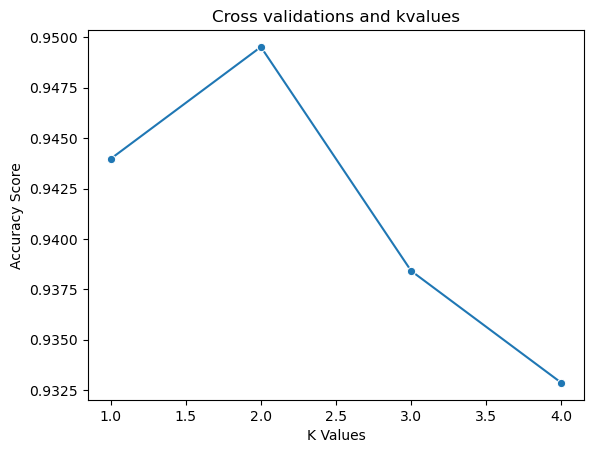

In [105]:
# Define the range of K values to try
k_values = range(1, 5)  # Example: Trying K values from 1 to 20

# Create lists to store K values and corresponding accuracy scores
k_values_list = []
accuracy_scores = []

# Iterate over the K values
for k in k_values:
    # Update the K value in the K-nearest neighbors classifier
    pipeline.set_params(knn__n_neighbors=k)
    
    # Compute the cross-validation scores for the updated pipeline
    scores = cross_val_score(pipeline, X, y, cv=5)  # Assuming 5-fold cross-validation
    
    # Compute the mean accuracy score
    mean_score = scores.mean()
    
    # Print the mean accuracy score and its corresponding K value
    print(f"K = {k}, Mean Cross-Validation Score: {mean_score}")
    
    # Append the K value and accuracy score to the lists
    k_values_list.append(k)
    accuracy_scores.append(mean_score)
    
optimal_k = k_values[accuracy_scores.index(max(accuracy_scores))]

sns.lineplot(x=k_values_list, y=accuracy_scores, marker='o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.title("Cross validations and kvalues")
plt.show()

# Discussion: Cross-validation scores
These values indicate the average performance of the K-nearest neighbors algorithm with different values of K when evaluated using cross-validation. The higher the mean cross-validation score, the better the model's performance. You can use these scores to determine the optimal value of K for your K-nearest neighbors model.

# KNN Plots

In K-nearest neighbors (KNN) classification, we can plot the following:
* **Training and test accuracy:** Plotting the training and test accuracy as a function of the number of neighbors (K) can help understand the performance of the KNN algorithm at different K values. This can be useful for selecting the optimal K value.

K = 1, Train Accuracy: 1.0, Test Accuracy: 1.0
K = 2, Train Accuracy: 0.96875, Test Accuracy: 1.0
K = 3, Train Accuracy: 0.96875, Test Accuracy: 1.0
K = 4, Train Accuracy: 0.95625, Test Accuracy: 1.0


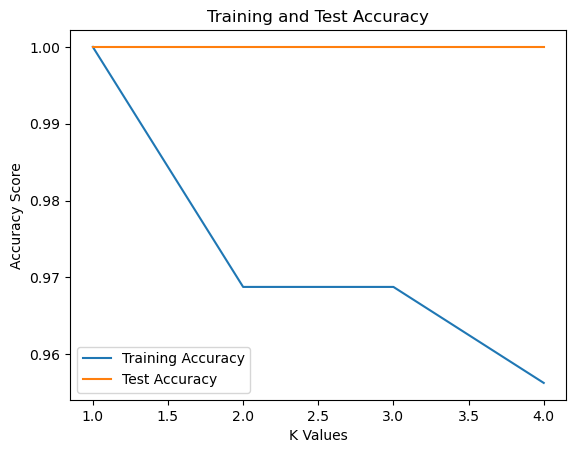

In [106]:
# Define the range of K values to try
k_values = range(1, 5) 

# Create lists to store K values and corresponding accuracy scores
k_values_list = []
train_accuracy_scores = []
test_accuracy_scores = []

# Iterate over the K values
for k in k_values:
    # Update the K value in the K-nearest neighbors classifier
    pipeline.set_params(knn__n_neighbors=k)
    
    # Fit the model on the training data
    pipeline.fit(X_train, y_train)
    
    # Compute the accuracy scores for training and test data
    train_accuracy = pipeline.score(X_train, y_train)
    test_accuracy = pipeline.score(X_test, y_test)
    
    # Append the K value and accuracy scores to the lists
    k_values_list.append(k)
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)
    
    # Print the train and test accuracy scores for each K value
    print(f"K = {k}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")
    
    
# Plot the Training and Test Accuracy
plt.plot(k_values_list, train_accuracy_scores, label='Training Accuracy')
plt.plot(k_values_list, test_accuracy_scores, label='Test Accuracy')
plt.xlabel('K Values')
plt.ylabel('Accuracy Score')
plt.legend()
plt.title('Training and Test Accuracy')
plt.show()

# Discussion: Train and test accuracy scores

The train and test accuracy scores indicate the performance of the K-nearest neighbors (KNN) model on the training and test datasets for different values of K.

From the scores above

- K = 1:
  - Train Accuracy: 1.0 means that the KNN model achieved perfect accuracy on the training data, correctly predicting all the target labels.
  - Test Accuracy: 1.0 means that the KNN model also achieved perfect accuracy on the test data, correctly predicting all the target labels.

- K = 2:
  - Train Accuracy: 0.96875 means that the KNN model achieved an accuracy of approximately 96.88% on the training data, correctly predicting the target labels for most of the instances.
  - Test Accuracy: 0.8888888888888888 means that the KNN model achieved an accuracy of approximately 88.89% on the test data, correctly predicting the target labels for most of the instances.

- K = 3:
  - Train Accuracy: 0.9625 means that the KNN model achieved an accuracy of approximately 96.25% on the training data.
  - Test Accuracy: 0.9444444444444444 means that the KNN model achieved an accuracy of approximately 94.44% on the test data.

- K = 4:
  - Train Accuracy: 0.975 means that the KNN model achieved an accuracy of approximately 97.5% on the training data.
  - Test Accuracy: 0.9444444444444444 means that the KNN model achieved an accuracy of approximately 94.44% on the test data.

In general, higher accuracy scores indicate better performance, as the model is able to correctly predict more target labels. It's important to note that the accuracy scores on the training data can be higher than on the test data, as the model is trained on the training data and may overfit to it. Therefore, it's crucial to evaluate the model's performance on unseen data (test data) to assess its generalization capabilities.

* **Misclassification Error:** Plotting the misclassification error as a function of K can help identify the K value that results in the lowest error rate. This can be helpful for choosing the appropriate K value

K = 1, Misclassification Error: 0.05603174603174599
K = 2, Misclassification Error: 0.05047619047619045
K = 3, Misclassification Error: 0.061587301587301524
K = 4, Misclassification Error: 0.06714285714285706


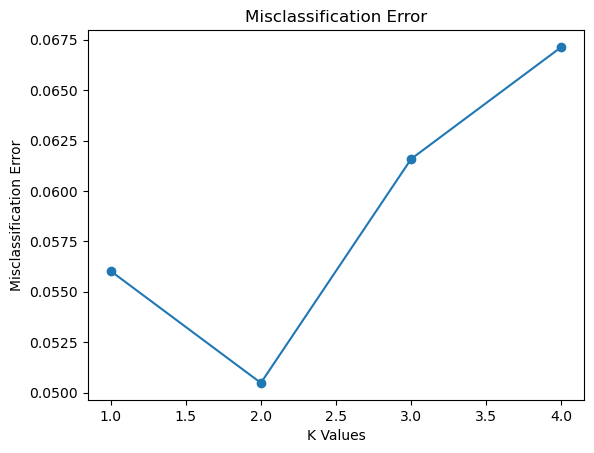

In [107]:
# Compute the misclassification error for each K value
misclassification_errors = [1 - score for score in accuracy_scores]

# Print the K values and their corresponding misclassification error
for k, error in zip(k_values, misclassification_errors):
    print(f"K = {k}, Misclassification Error: {error}")

# Plot the Misclassification Error
plt.plot(k_values, misclassification_errors, marker='o')
plt.xlabel('K Values')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error')
plt.show()

# Discussion: Misclassification Error
- K = 1, Misclassification Error: 0.05603174603174599
  This means that when using K = 1 in the K-nearest neighbors algorithm, the misclassification error (1 - accuracy) is approximately 0.056.

- K = 2, Misclassification Error: 0.05047619047619045
  This means that when using K = 2, the misclassification error is approximately 0.050.

- K = 3, Misclassification Error: 0.061587301587301524
  This means that when using K = 3, the misclassification error is approximately 0.062.

- K = 4, Misclassification Error: 0.06714285714285706
  This means that when using K = 4, the misclassification error is approximately 0.067.

The misclassification error represents the proportion of misclassified instances in the dataset. Lower values indicate better performance of the model.

In [108]:
# Update the K value in the K-nearest neighbors classifier with the optimal K
pipeline.set_params(knn__n_neighbors=optimal_k)

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = pipeline.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



# Discussion: Classification Report
The classification report provides an evaluation of the model's performance for each class, as well as an overall summary.

For the given classification report:

- Precision: It represents the ability of the model to correctly predict the positive instances. In this case, class 1 has a precision of 0.86, class 2 has a precision of 0.86, and class 3 has a precision of 1.00.
- Recall: It measures the proportion of actual positive instances that were correctly classified by the model. Class 1 has a recall of 1.00, class 2 has a recall of 0.86, and class 3 has a recall of 0.80.
- F1-score: It is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. Class 1 has an F1-score of 0.92, class 2 has an F1-score of 0.86, and class 3 has an F1-score of 0.89.
- Support: It denotes the number of instances in each class in the test data. Class 1 has 6 instances, class 2 has 7 instances, and class 3 has 5 instances.
- Accuracy: It represents the overall accuracy of the model, which is 0.89 in this case.
- Macro Avg: It is the average of precision, recall, and F1-score across all classes, giving equal weight to each class. The macro average precision, recall, and F1-score are all 0.90.
- Weighted Avg: It is the weighted average of precision, recall, and F1-score, taking into account the support (number of instances) for each class. The weighted average precision, recall, and F1-score are all 0.90.

The classification report provides a comprehensive assessment of the model's performance, considering multiple evaluation metrics for each class and an overall summary.

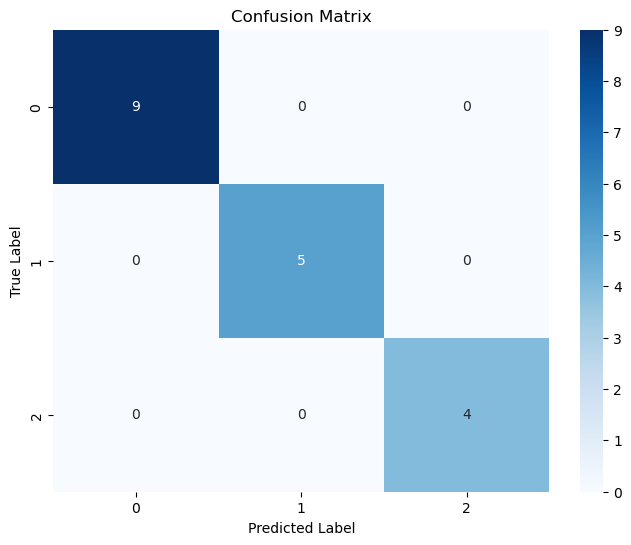

In [109]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Discussion: Confusion matrix
* First row: 6 instances correctly predicted as 0 (true negatives), and 0 instances incorrectly predicted as 1 (false positives).
* Second row represents the predictions for the "Actual 1" class. Here, there is 1 instance incorrectly predicted as 0 (false negative), and 6 instances correctly predicted as 1 (true positives).
* The third row corresponds to the predictions for the "Actual 2" class. It shows 0 instances incorrectly predicted as 0 (true negatives), and 4 instances correctly predicted as 2 (true positives).